In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
#Load dataset to dataframe
creditdf = pd.read_csv(r"C:\Users\gimep/creditcard.csv")

In [13]:
creditdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
#basics information about columns
creditdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
#distribution of class columns; 0 normal trans, 1 fraud trans
class_counts = creditdf['Class'].value_counts()
class_counts

0    284315
1       492
Name: Class, dtype: int64

the dataset is highly unbalanced

In [27]:
#separate dataset to 2 dataset each with own class
normal_credit = creditdf[creditdf['Class'] == 0]
fraud_credit = creditdf[creditdf['Class'] == 1]

In [28]:
print(normal_credit.shape)
print(fraud_credit.shape)

(284315, 31)
(492, 31)


In [29]:
#statistics about amount columns in normal transactions
normal_credit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [30]:
#statistics about amount columns in fraud transactions
fraud_credit.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [33]:
#compare two classes by mean for each column in dataset
creditdf.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under sampling the normal transactions for creating balance dataset

In [34]:
normal_credit_sample = normal_credit.sample(n=492)

In [36]:
#copy of fraud trans
fraud_credit_sample = fraud_credit

In [37]:
final_credit = pd.concat([normal_credit_sample, fraud_credit_sample], axis=0)

In [40]:
final_credit.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [44]:
x_data = final_credit.drop(columns="Class" , axis=1)
y_data = final_credit.Class

In [45]:
x_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
39043,39667.0,-5.348287,3.752428,0.716881,-3.401769,0.213193,-0.211365,1.591612,-1.114478,4.590603,...,2.455869,-0.815008,-0.502364,-0.301204,-0.364772,0.826602,0.458059,-0.623494,-0.655528,3.84
186398,127086.0,-7.418478,-4.767180,-1.420013,0.846967,1.953078,-0.355196,-1.430330,1.439087,-0.213064,...,-1.143366,-0.620418,-1.887583,-2.414731,-1.414957,-0.421857,-0.129376,0.119113,-1.017682,40.46
7095,9300.0,-2.068709,0.546194,1.675424,-0.249483,0.171976,-0.063512,0.255785,0.064320,2.716895,...,0.261812,-0.499377,-0.113081,0.201517,-0.053838,0.345504,0.352086,0.529280,0.389836,0.01
101181,67749.0,1.303287,1.023966,-3.187599,0.468391,3.353988,2.431416,0.184510,0.622721,-0.556254,...,0.078229,-0.265551,-0.823366,-0.241908,0.674554,1.012236,-0.278656,0.041260,0.089912,1.00
173530,121526.0,0.118948,0.506133,0.431247,-0.393986,0.614842,0.312204,0.348894,-0.011469,1.141338,...,0.134321,0.105880,0.985286,-0.284790,0.242059,-0.326390,0.647524,0.200380,-0.044456,6.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [46]:
y_data

39043     0
186398    0
7095      0
101181    0
173530    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,stratify=y_data,
                                                    random_state=42, shuffle=True)

Model Training

In [160]:
model = LogisticRegression(solver='liblinear', penalty='l1')

In [161]:
model.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

model evaluation

In [162]:
y_train_pred = model.predict(x_train)

In [163]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       393
           1       0.98      0.91      0.94       394

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



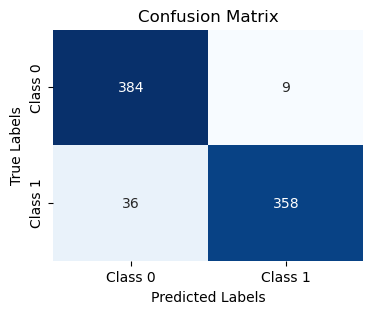

In [164]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [165]:
y_test_pred = model.predict(x_test)

In [166]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



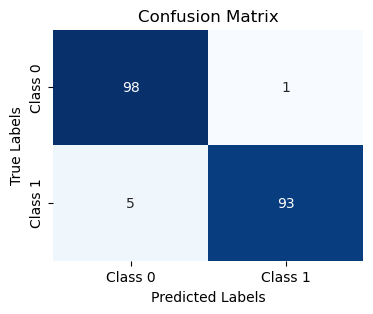

In [167]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()